# Loading packages

In [24]:
from pyzbar.pyzbar import decode
from PIL import Image
import cbor2
import base45
import zlib
import json
from cose.messages import CoseMessage
import hexdump
import base64
import requests
from asn1crypto.x509 import Certificate
from cryptography import x509
from datetime import datetime
from IPython.display import display

# The QR Code

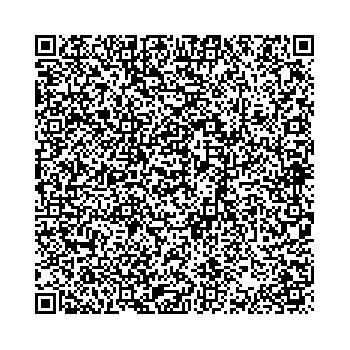

In [25]:
img = Image.open('imgs/vaccination.png')
display(img)


# What's actually in there?

In [26]:
decoded = decode(img)
qr = decoded[0].data.decode()

print(qr)

HC1:NCFOXN%TS3DH3ZSUZK+.V0ETD%65NL-AH-R6IOO6+IUKRG*I.I5BROCWAAT4V22F/8X*G3M9JUPY0BX/KR96R/S09T./0LWTKD33236J3TA3M*4VV2 73-E3GG396B-43O058YIB73A*G3W19UEBY5:PI0EGSP4*2DN43U*0CEBQ/GXQFY73CIBC:G 7376BXBJBAJ UNFMJCRN0H3PQN*E33H3OA70M3FMJIJN523.K5QZ4A+2XEN QT QTHC31M3+E32R44$28A9H0D3ZCL4JMYAZ+S-A5$XKX6T2YC 35H/ITX8GL2-LH/CJTK96L6SR9MU9RFGJA6Q3QR$P2OIC0JVLA8J3ET3:H3A+2+33U SAAUOT3TPTO4UBZIC0JKQTL*QDKBO.AI9BVYTOCFOPS4IJCOT0$89NT2V457U8+9W2KQ-7LF9-DF07U$B97JJ1D7WKP/HLIJLRKF1MFHJP7NVDEBU1J*Z222E.GJF67Z JA6B.38O4BH*HB0EGLE2%V -3O+J3.PI2G:M1SSP2Y3D38-G9C+Q3OT/.J1CDLKOYUV5C3W1A:75S4LB:6REPKM3ZYO4+QDNDLT2*ESLIH


# Ok, lets remove the prefix (`HC1:`)

In [27]:
data = qr[4:]

print(data)

NCFOXN%TS3DH3ZSUZK+.V0ETD%65NL-AH-R6IOO6+IUKRG*I.I5BROCWAAT4V22F/8X*G3M9JUPY0BX/KR96R/S09T./0LWTKD33236J3TA3M*4VV2 73-E3GG396B-43O058YIB73A*G3W19UEBY5:PI0EGSP4*2DN43U*0CEBQ/GXQFY73CIBC:G 7376BXBJBAJ UNFMJCRN0H3PQN*E33H3OA70M3FMJIJN523.K5QZ4A+2XEN QT QTHC31M3+E32R44$28A9H0D3ZCL4JMYAZ+S-A5$XKX6T2YC 35H/ITX8GL2-LH/CJTK96L6SR9MU9RFGJA6Q3QR$P2OIC0JVLA8J3ET3:H3A+2+33U SAAUOT3TPTO4UBZIC0JKQTL*QDKBO.AI9BVYTOCFOPS4IJCOT0$89NT2V457U8+9W2KQ-7LF9-DF07U$B97JJ1D7WKP/HLIJLRKF1MFHJP7NVDEBU1J*Z222E.GJF67Z JA6B.38O4BH*HB0EGLE2%V -3O+J3.PI2G:M1SSP2Y3D38-G9C+Q3OT/.J1CDLKOYUV5C3W1A:75S4LB:6REPKM3ZYO4+QDNDLT2*ESLIH


# Is this base64?


**No, not really...**

# It's base45!

In [28]:
compressed = base45.b45decode(data)


# WTF is base45?

> Qr and Aztec code have a specific, highly efficient, method for storing alphanumeric characters ...
>
> For this reason, the industry generally encodes these in base45. A document for this de-facto standard is in progress:

Source: <https://github.com/ehn-dcc-development/hcert-spec#base45>

## Industry standard?

## Other oipinions

> Note that this encoding isn't of the same efficiency as QR binary mode, as it converts 3 bytes into 2 base45 characters. So it's more like 'base41 using the base45' charset.
>
> ...
>
> For the Dutch variant of the green pass using unlinkable signatures, we need all the space we can get, so we use a base45 encoding that uses the exact same method as base58, and which has the exact same efficiency as QR binary mode.

Source: <https://news.ycombinator.com/item?id=27603173>


In [29]:
hexdump.hexdump(compressed)


00000000: 78 DA BB D4 E2 BB 88 C5  E3 A6 A4 79 FC C1 E7 DB  x..........y....
00000010: 36 31 AA 2D 88 64 34 5E  C2 22 95 70 D9 35 95 4D  61.-.d4^.".p.5.M
00000020: 2A E1 C2 A2 54 C6 24 C7  10 4B 46 E6 85 8C 4B 12  *...T.$..KF...K.
00000030: CB 1A 57 25 A5 E4 31 26  E5 26 E6 FA 07 B9 EB 1A  ..W%..1&.&......
00000040: 1A 18 18 18 1B 18 19 9A  26 95 15 64 19 1A 1A 5A  ........&..d...Z
00000050: 1A 9B 58 1A 18 98 27 A5  94 64 19 01 85 75 0D 8C  ..X...'..d...u..
00000060: 74 0D 2D 92 92 F3 81 06  24 25 67 56 18 86 06 F9  t.-.....$%gV....
00000070: 59 85 86 39 7B 5A 19 18  5A 39 86 58 19 1A 58 18  Y..9{Z..Z9.X..X.
00000080: 98 5B 98 18 BB 59 9A 38  BA BA 1A B8 BA 9A 1A 58  .[...Y.8.......X
00000090: 1A BB 39 39 1B 99 9A 38  B9 58 18 1A 2B 3B 25 E5  ..99...8.X..+;%.
000000A0: 16 E4 B8 86 EA 1B EA 1B  19 E8 1B 9A 1A 59 24 65  .............Y$e
000000B0: 16 57 48 FB 66 E6 65 16  97 14 55 2A E4 A7 29 78  .WH.f.e...U*..)x
000000C0: A4 26 E6 94 64 E8 28 38  96 02 45 32 13 93 8A 53  .&..d.(8..E2...S


# Ok, still looks garbage

# Encryption?

# No, just compression (ZLib)

In [30]:
decompressed = zlib.decompress(compressed)
print(f"Size compressed: {len(compressed)}")
print(f"Size decompressed: {len(decompressed)}")
print(f"Saved: {len(decompressed) - len(compressed)}")

hexdump.hexdump(decompressed)

Size compressed: 400
Size decompressed: 393
Saved: -7
00000000: D2 84 4D A2 04 48 D9 19  37 5F C1 E7 B6 B2 01 26  ..M..H..7_.....&
00000010: A0 59 01 33 A4 04 1A 60  D3 45 65 06 1A 60 D0 A2  .Y.3...`.Ee..`..
00000020: 65 01 62 41 54 39 01 03  A1 01 A4 61 76 81 AA 62  e.bAT9.....av..b
00000030: 64 6E 01 62 6D 61 6D 4F  52 47 2D 31 30 30 30 33  dn.bmamORG-10003
00000040: 30 32 31 35 62 76 70 6A  31 31 31 39 33 34 39 30  0215bvpj11193490
00000050: 30 37 62 64 74 6A 32 30  32 31 2D 30 32 2D 31 38  07bdtj2021-02-18
00000060: 62 63 6F 62 41 54 62 63  69 78 31 55 52 4E 3A 55  bcobATbcix1URN:U
00000070: 56 43 49 3A 30 31 3A 41  54 3A 31 30 38 30 37 38  VCI:01:AT:108078
00000080: 34 33 46 39 34 41 45 45  30 45 45 35 30 39 33 46  43F94AEE0EE5093F
00000090: 42 43 32 35 34 42 44 38  31 33 23 42 62 6D 70 6C  BC254BD813#Bbmpl
000000A0: 45 55 2F 31 2F 32 30 2F  31 35 32 38 62 69 73 78  EU/1/20/1528bisx
000000B0: 1B 4D 69 6E 69 73 74 72  79 20 6F 66 20 48 65 61  .Ministry of Hea
000000C0: 6C 74 68 2C 

# Much better

# Next step: Removing the signatur

In [31]:
msg = CoseMessage.decode(decompressed)
hexdump.hexdump(msg.payload)

00000000: A4 04 1A 60 D3 45 65 06  1A 60 D0 A2 65 01 62 41  ...`.Ee..`..e.bA
00000010: 54 39 01 03 A1 01 A4 61  76 81 AA 62 64 6E 01 62  T9.....av..bdn.b
00000020: 6D 61 6D 4F 52 47 2D 31  30 30 30 33 30 32 31 35  mamORG-100030215
00000030: 62 76 70 6A 31 31 31 39  33 34 39 30 30 37 62 64  bvpj1119349007bd
00000040: 74 6A 32 30 32 31 2D 30  32 2D 31 38 62 63 6F 62  tj2021-02-18bcob
00000050: 41 54 62 63 69 78 31 55  52 4E 3A 55 56 43 49 3A  ATbcix1URN:UVCI:
00000060: 30 31 3A 41 54 3A 31 30  38 30 37 38 34 33 46 39  01:AT:10807843F9
00000070: 34 41 45 45 30 45 45 35  30 39 33 46 42 43 32 35  4AEE0EE5093FBC25
00000080: 34 42 44 38 31 33 23 42  62 6D 70 6C 45 55 2F 31  4BD813#BbmplEU/1
00000090: 2F 32 30 2F 31 35 32 38  62 69 73 78 1B 4D 69 6E  /20/1528bisx.Min
000000A0: 69 73 74 72 79 20 6F 66  20 48 65 61 6C 74 68 2C  istry of Health,
000000B0: 20 41 75 73 74 72 69 61  62 73 64 02 62 74 67 69   Austriabsd.btgi
000000C0: 38 34 30 35 33 39 30 30  36 63 6E 61 6D A4 63 66  840539006cnam.cf

# Yeah, less binary blobs

# Ok, thats no json, but seems kinda similar...

# It's CBOR!

# WTF is CBOR?

- pretty much equivalent to json
- supports binary blobs (in json only possible using base64)
- uses raw bytes for content structure

In [32]:
obj=cbor2.loads(msg.payload)
print(json.dumps(obj, indent=4))

{
    "4": 1624458597,
    "6": 1624285797,
    "1": "AT",
    "-260": {
        "1": {
            "v": [
                {
                    "dn": 1,
                    "ma": "ORG-100030215",
                    "vp": "1119349007",
                    "dt": "2021-02-18",
                    "co": "AT",
                    "ci": "URN:UVCI:01:AT:10807843F94AEE0EE5093FBC254BD813#B",
                    "mp": "EU/1/20/1528",
                    "is": "Ministry of Health, Austria",
                    "sd": 2,
                    "tg": "840539006"
                }
            ],
            "nam": {
                "fnt": "MUSTERFRAU<GOESSINGER",
                "fn": "Musterfrau-G\u00f6\u00dfinger",
                "gnt": "GABRIELE",
                "gn": "Gabriele"
            },
            "ver": "1.2.1",
            "dob": "1998-02-26"
        }
    }
}


# Enhance!

```json
{
    "expiration Time": 1624458597,
    "issued at": 1624285797,
    "issuer": "AT",
    "health certificate": {
        "EU digital covid certificate v1": {
            "vaccination": [
                {
                    "doses received": 1,
                    "manufacture": "ORG-100030215",
                    "product type": "1119349007", // Vaccine or prophylaxis
                    "date of vaccination": "2021-02-18",
                    "country": "AT",
                    "certificate id": "URN:UVCI:01:AT:10807843F94AEE0EE5093FBC254BD813#B",
                    "product id": "EU/1/20/1528",
                    "issuer": "Ministry of Health, Austria",
                    "total number of doses": 2,
                    "targeted disease": "840539006"
                }
            ],
            "name": {
                "family name (standardized)": "MUSTERFRAU<GOESSINGER",
                "family name": "Musterfrau-G\u00f6\u00dfinger",
                "given name (standardized)": "GABRIELE",
                "given name": "Gabriele"
            },
            "version": "1.2.1",
            "date of birth": "1998-02-26"
        }
    }
}
```

# Enhance!

```json
{
    "expiration time": "2023-06-23",
    "issued at": "2021-06-21",
    "issuer": "AT",
    "health certificate": {
        "EU digital covid certificate v1": {
            "vaccination": [
                {
                    "doses received": 1,
                    "manufacture": "ORG-100030215",   //TODO:
                    "product type": "1119349007", // Vaccine or prophylaxis
                    "date of vaccination": "2021-02-18",
                    "country": "AT",
                    "certificate id": "URN:UVCI:01:AT:10807843F94AEE0EE5093FBC254BD813#B",
                    "product id": "EU/1/20/1528",  //TODO:
                    "issuer": "Ministry of Health, Austria",
                    "total number of doses": 2,
                    "targeted disease": "COVID-19"
                }
            ],
            "name": {
                "family name (standardized)": "MUSTERFRAU<GOESSINGER",
                "family name": "Musterfrau-Gößinger",
                "given name (standardized)": "GABRIELE",
                "given name": "Gabriele"
            },
            "version": "1.2.1",
            "date of birth": "1998-02-26"
        }
    }
}
```

Sources:

- <https://github.com/ehn-dcc-development/hcert-spec/blob/main/hcert_spec.md>
- <https://gir.st/blog/greenpass.html>



# Verification of validity

![](imgs/CertDiagram.png)

![](imgs/RuleDiagram.png)

# Download trustlist

In [33]:
response = requests.get("https://dgc-trust.qr.gv.at/trustlist")
assert(response.ok)
hexdump.hexdump(response.content[:256])

00000000: BF 61 63 9F BF 61 69 48  F9 C0 D5 11 5B 45 58 C1  .ac..aiH....[EX.
00000010: 61 63 59 04 24 30 82 04  20 30 82 02 08 A0 03 02  acY.$0.. 0......
00000020: 01 02 02 14 7A D1 AE 90  70 C1 82 9A A9 4F CD 9E  ....z...p....O..
00000030: 5C 10 59 C2 45 AA 94 21  30 0D 06 09 2A 86 48 86  \.Y.E..!0...*.H.
00000040: F7 0D 01 01 0B 05 00 30  32 31 0B 30 09 06 03 55  .......021.0...U
00000050: 04 06 13 02 46 52 31 0D  30 0B 06 03 55 04 0A 0C  ....FR1.0...U...
00000060: 04 47 6F 75 76 31 14 30  12 06 03 55 04 03 0C 0B  .Gouv1.0...U....
00000070: 43 53 43 41 2D 46 52 41  4E 43 45 30 1E 17 0D 32  CSCA-FRANCE0...2
00000080: 32 30 33 30 39 32 33 30  30 30 30 5A 17 0D 32 34  20309230000Z..24
00000090: 30 33 30 39 32 33 30 30  30 30 5A 30 4A 31 0B 30  0309230000Z0J1.0
000000A0: 09 06 03 55 04 06 13 02  46 52 31 0D 30 0B 06 03  ...U....FR1.0...
000000B0: 55 04 0A 0C 04 41 50 48  50 31 17 30 15 06 03 55  U....APHP1.0...U
000000C0: 04 0B 0C 0E 32 36 37 35  30 30 34 35 32 30 30 30  ....267500452000

# Decode from cbor

In [34]:
trustlist = cbor2.loads(response.content)

trustlist['c'] = trustlist['c'][:5]

for c in trustlist['c']:
   c['i'] = base64.b64encode(c['i']).decode()

   cert = Certificate.load(c['c'])
   del(c['c'])
   c['issuer'] = cert.issuer.human_friendly
   c['subject'] = cert.subject.human_friendly
print(json.dumps(trustlist, indent=4))


{
    "c": [
        {
            "i": "+cDVEVtFWME=",
            "issuer": "Common Name: CSCA-FRANCE, Organization: Gouv, Country: FR",
            "subject": "Common Name: DSC_FR_007, Organizational Unit: 26750045200011, Organization: APHP, Country: FR"
        },
        {
            "i": "/IcqIBnnZzc=",
            "issuer": "Organizational Unit: Legal Person; Organization Identifier: VATES-B85626240; Country: ES; Organization: European Agency of Digital Trust, S.L.; Common Name: EADTrust ECC 256 SubCA For Qualified Certificates 2019",
            "subject": "Common Name: IBSALUT-CVD-SELLO, Serial Number: Q0719003F, Organizational Unit: SELLO ELECTRONICO, Organization Identifier: VATES-Q0719003F, Organization: SERVICIO DE SALUD DE LAS ISLAS BALEARES, Country: ES"
        },
        {
            "i": "02vdAOY/+gI=",
            "issuer": "Common Name: Grand Duchy of Luxembourg CSCA, Organization: INCERT public agency, Country: LU",
            "subject": "Common Name: Grand Duch

# Validating the signature of the qr code

In [35]:
import re
from cose.keys import CoseKey
from cose.keys.curves import CoseCurve, P256, P384, P521
from cose.keys.keyops import VerifyOp
from cose.keys.keyparam import KpAlg, EC2KpX, EC2KpY, EC2KpCurve, KpKty, RSAKpN, RSAKpE, KpKeyOps
from cose.keys.keytype import KtyEC2, KtyRSA
from cose.messages import CoseMessage
from cose.algorithms import Ps256, Es256
from typing import Dict, Type
from cryptography.hazmat.primitives.asymmetric.rsa import RSAPublicKey
from cryptography.hazmat.primitives.asymmetric.ec import EllipticCurvePublicKey, EllipticCurvePublicNumbers, ECDSA, SECP256R1, EllipticCurve

CURVE_NAME_IGNORE = re.compile(r'[-_ ]')
COSE_CURVES: Dict[str, Type[CoseCurve]] = {
    'secp256r1':  P256,
    'prime256v1': P256,
    'secp384r1':  P384,
    'secp521r1':  P521,
}

def cert_to_cose_key(cert: x509.Certificate) -> CoseKey:
    pk = cert.public_key()
    if isinstance(pk, EllipticCurvePublicKey):
        ec_pn = pk.public_numbers()
        size = pk.curve.key_size // 8

        x = ec_pn.x.to_bytes(size, byteorder="big")
        y = ec_pn.y.to_bytes(size, byteorder="big")

        curve_name = CURVE_NAME_IGNORE.sub('', pk.curve.name).lower()
        curve = COSE_CURVES.get(curve_name)

        if not curve:
            raise NotImplementedError(f'Unsupported curve: {pk.curve.name}')

        return CoseKey.from_dict(
            {
                KpKeyOps: [VerifyOp],
                KpKty: KtyEC2,
                EC2KpCurve: curve,
                KpAlg: Es256,
                EC2KpX: x,
                EC2KpY: y,
            }
        )
    elif isinstance(pk, RSAPublicKey):
        rsa_pn = pk.public_numbers()
        e = rsa_pn.e.to_bytes((rsa_pn.e.bit_length() + 7) // 8, byteorder='big')
        n = rsa_pn.n.to_bytes((rsa_pn.n.bit_length() + 7) // 8, byteorder='big')

        return CoseKey.from_dict(
            {
                KpKeyOps: [VerifyOp],
                KpKty: KtyRSA,
                KpAlg: Ps256,
                RSAKpE: e,
                RSAKpN: n,
            }
        )
    #elif isinstance(pk, DSAPublicKey):
    #    dsa_pn = pk.public_numbers()
    #    return CoseKey.from_dict(
    #        {
    #            # ???
    #        }
    #    )
    else:
        pk_type = type(pk)
        raise NotImplementedError(f'Unsupported public key type: {pk_type.__module__}.{pk_type.__name__}')

In [36]:
trustlist = cbor2.loads(response.content)

for c in trustlist['c']:
   try:
      cert = x509.load_der_x509_certificate(c['c'])
      msg.key = cert_to_cose_key(cert)
      if msg.verify_signature():
         print(f"Found match: {cert}")
         break
   except:
      continue


# Download the trustlist signature

In [37]:
sigResponse = requests.get("https://dgc-trust.qr.gv.at/trustlistsig")
assert(sigResponse.ok)
hexdump.hexdump(sigResponse.content)


00000000: D2 84 50 A3 01 26 04 48  E0 9F F7 8F 02 52 06 B6  ..P..&.H.....R..
00000010: 18 2A 02 A0 58 30 A3 02  58 20 D3 61 49 0D EB AC  .*..X0..X .aI...
00000020: C4 65 10 F7 2E 61 69 9E  75 9C 29 EE BE 85 46 CB  .e...ai.u.)...F.
00000030: C9 BF 3D AB E1 9E 5F 10  A1 C4 04 1A 61 A7 A7 B4  ..=..._.....a...
00000040: 05 1A 61 A5 04 B4 58 40  A6 25 A3 6F BD 0A EA 22  ..a...X@.%.o..."
00000050: B3 E5 29 96 6B 2F 62 72  99 71 D4 ED 19 5C 5F 86  ..).k/br.q...\_.
00000060: D4 42 7C 74 CE 74 63 F0  E0 98 88 19 DD 82 2A 01  .B|t.tc.......*.
00000070: E7 F9 F5 C2 2D 97 16 0B  87 97 8F F3 72 B2 69 72  ....-.......r.ir
00000080: 6B 8A 44 C4 FE 42 0D 72                           k.D..B.r


# Validate the signature

In [38]:
root_cert_raw = """-----BEGIN CERTIFICATE-----
MIIB1DCCAXmgAwIBAgIKAXnM+Z3eG2QgVzAKBggqhkjOPQQDAjBEMQswCQYDVQQG
EwJBVDEPMA0GA1UECgwGQk1TR1BLMQwwCgYDVQQFEwMwMDExFjAUBgNVBAMMDUFU
IERHQyBDU0NBIDEwHhcNMjEwNjAyMTM0NjIxWhcNMjIwNzAyMTM0NjIxWjBFMQsw
CQYDVQQGEwJBVDEPMA0GA1UECgwGQk1TR1BLMQ8wDQYDVQQFEwYwMDEwMDExFDAS
BgNVBAMMC0FUIERHQyBUTCAxMFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEl2tm
d16CBHXwcBN0r1Uy+CmNW/b2V0BNP85y5N3JZeo/8l9ey/jIe5mol9fFcGTk9bCk
8zphVo0SreHa5aWrQKNSMFAwDgYDVR0PAQH/BAQDAgeAMB0GA1UdDgQWBBRTwp6d
cDGcPUB6IwdDja/a3ncM0TAfBgNVHSMEGDAWgBQfIqwcZRYptMGYs2Nvv90Jnbt7
ezAKBggqhkjOPQQDAgNJADBGAiEAlR0x3CRuQV/zwHTd2R9WNqZMabXv5XqwHt72
qtgnjRgCIQCZHIHbCvlgg5uL8ZJQzAxLavqF2w6uUxYVrvYDj2Cqjw==
-----END CERTIFICATE-----"""
   
sigMsg = CoseMessage.decode(sigResponse.content)

sigMsg.key = cert_to_cose_key(x509.load_pem_x509_certificate(root_cert_raw.encode()))
if sigMsg.verify_signature():
   print("Verification successfull!")
else:
   print("Verification failed!")

print()

hexdump.hexdump(sigMsg.payload)


Verification successfull!

00000000: A3 02 58 20 D3 61 49 0D  EB AC C4 65 10 F7 2E 61  ..X .aI....e...a
00000010: 69 9E 75 9C 29 EE BE 85  46 CB C9 BF 3D AB E1 9E  i.u.)...F...=...
00000020: 5F 10 A1 C4 04 1A 61 A7  A7 B4 05 1A 61 A5 04 B4  _.....a.....a...


# It's CBOR again. Yeah!

In [39]:
sig = cbor2.loads(sigMsg.payload)

sig[2] = base64.b64encode(sig[2]).decode()

print(json.dumps(sig))

{"2": "02FJDeusxGUQ9y5haZ51nCnuvoVGy8m/Pavhnl8QocQ=", "4": 1638377396, "5": 1638204596}


# Enhance!

In [40]:
sig = cbor2.loads(sigMsg.payload)

sig[2] = base64.b64encode(sig[2]).decode()
sig[4] = datetime.fromtimestamp(sig[4]).strftime("%d.%m.%y %H:%M:%S")
sig[5] = datetime.fromtimestamp(sig[5]).strftime("%d.%m.%y %H:%M:%S")

print(json.dumps(sig))


{"2": "02FJDeusxGUQ9y5haZ51nCnuvoVGy8m/Pavhnl8QocQ=", "4": "01.12.21 17:49:56", "5": "29.11.21 17:49:56"}


# Validate trustlist

In [41]:
import hashlib
import numpy as np

sig = cbor2.loads(sigMsg.payload)
hash = hashlib.sha256(response.content).digest()

if np.array_equal(sig[2], hash[:len(sig[2])]):
   print("Verification successfull!")
else:
   print("Verification failed!")
   

Verification successfull!


# What about the Rules?

In [42]:
rulesResponse = requests.get("https://dgc-trust.qr.gv.at/rules")
assert(rulesResponse.ok)
rules = cbor2.loads(rulesResponse.content)
rules['r'] = rules['r'][:5]

print(json.dumps(rules, indent=4))


{
    "r": [
        {
            "i": "TR-EE-0008",
            "r": "{\"Identifier\":\"TR-EE-0008\",\"Type\":\"Acceptance\",\"Country\":\"EE\",\"Version\":\"1.0.2\",\"SchemaVersion\":\"1.0.0\",\"Engine\":\"CERTLOGIC\",\"EngineVersion\":\"0.7.5\",\"CertificateType\":\"Test\",\"Description\":[{\"lang\":\"en\",\"desc\":\"This must be a valid test manufacturer from the value set list.\"},{\"lang\":\"ee\",\"desc\":\"Testi tootja peab olema EL nimekirjas.\"}],\"ValidFrom\":\"2021-09-06T00:00:00Z\",\"ValidTo\":\"2022-09-01T00:00:00Z\",\"AffectedFields\":[\"t.0\",\"t.0.ma\",\"t.0.tt\"],\"Logic\":{\"if\":[{\"var\":\"payload.t.0\"},{\"if\":[{\"===\":[{\"var\":\"payload.t.0.tt\"},\"LP217198-3\"]},{\"in\":[{\"var\":\"payload.t.0.ma\"},{\"var\":\"external.valueSets.covid-19-lab-test-manufacturer-and-name\"}]},true]},true]}}"
        },
        {
            "i": "RR-EE-0001",
            "r": "{\"Identifier\":\"RR-EE-0001\",\"Type\":\"Acceptance\",\"Country\":\"EE\",\"Version\":\"1.0.2\",\"Schem

# Enhance! (and filter)


In [43]:
rules = cbor2.loads(rulesResponse.content)
AT_ET = []

for r in rules['r']:
   x = json.loads(r['r'])
   if x['Country'] == "AT" and x['Region'] == "ET":
      AT_ET.append(x)

print(json.dumps(AT_ET, indent=4))


[
    {
        "Identifier": "GR-AT-0000",
        "Type": "Acceptance",
        "Country": "AT",
        "Version": "1.0.0",
        "SchemaVersion": "1.0.0",
        "Engine": "CERTLOGIC",
        "EngineVersion": "0.7.5",
        "CertificateType": "General",
        "Description": [
            {
                "lang": "en",
                "desc": "Exactly one type of event. Only r and v"
            },
            {
                "lang": "de",
                "desc": "Genau ein Event-Typ vorhanden."
            }
        ],
        "ValidFrom": "2021-11-07T22:00:00Z",
        "ValidTo": "2030-06-01T00:00:00Z",
        "AffectedFields": [
            "r",
            "v"
        ],
        "Logic": {
            "===": [
                {
                    "reduce": [
                        [
                            {
                                "var": "payload.r"
                            },
                            {
                                "var": "pa